<a href="https://colab.research.google.com/github/nourelsafty1/datavisualization/blob/main/Data_engineering_%26_visualization_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Exploration
path = kagglehub.dataset_download('pranavuikey/zomato-eda')
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        filepath = os.path.join(path, filename)
        break

data = pd.read_csv(filepath)
print(data.shape)



100%|██████████| 89.0M/89.0M [00:01<00:00, 73.6MB/s]

Extracting files...


(51717, 17)


In [ ]:
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)

Missing Values per Column:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Data Types of Each Column:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object

In [ ]:
# For 'reviews_list' and 'menu_item', the null values are placeholders []
data['menu_item'] = data['menu_item'].apply(lambda x: np.nan if x == '[]' else x)
data['reviews_list'] = data['reviews_list'].apply(lambda x: np.nan if x == '[]' else x)

missing_values = data.isnull().sum()
print("Missing Values After Conversion:")
print(missing_values)


Missing Values After Conversion:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                    7595
menu_item                      39617
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
# Identifying anomalies in 'rate'
rate_anomalies = data[~data['rate'].str.match(r'^\d+(\.\d+)?/5$', na=True)]
print("\nRows with 'rate' Anomalies (non-numeric):")
print(rate_anomalies[['url', 'rate']])


Rows with 'rate' Anomalies (non-numeric):
                                                     url    rate
72     https://www.zomato.com/bangalore/spicy-tandoor...     NEW
75     https://www.zomato.com/bangalore/om-sri-vinaya...     NEW
103    https://www.zomato.com/bangalore/floured-baked...  3.8 /5
110    https://www.zomato.com/bangalore/hari-super-sa...     NEW
130    https://www.zomato.com/bangalore/roll-magic-fa...     NEW
...                                                  ...     ...
51709  https://www.zomato.com/bangalore/the-farm-hous...  3.7 /5
51711  https://www.zomato.com/bangalore/bhagini-2-whi...  2.5 /5
51712  https://www.zomato.com/bangalore/best-brews-fo...  3.6 /5
51715  https://www.zomato.com/bangalore/chime-sherato...  4.3 /5
51716  https://www.zomato.com/bangalore/the-nest-the-...  3.4 /5

[22654 rows x 2 columns]


In [ ]:
# Converting 'approx_cost(for two people)' to string and finding anomalies
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)
cost_anomalies = data[~data['approx_cost(for two people)'].str.isnumeric()]
print("\nRows with 'approx_cost(for two people)' Anomalies (non-numeric):")
print(cost_anomalies[['url', 'approx_cost(for two people)']])


Rows with 'approx_cost(for two people)' Anomalies (non-numeric):
                                                     url  \
67     https://www.zomato.com/gustoesbeerhouse?contex...   
119    https://www.zomato.com/bangalore/k27-the-pub-b...   
166    https://www.zomato.com/bangalore/patio-805-jay...   
207    https://www.zomato.com/bangalore/chutney-chang...   
217    https://www.zomato.com/bangalore/toscano-jayan...   
...                                                  ...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

      approx_cost(for two people)  
67                          1,200  
119                         1,000  
166                         1,200  
207                         1,500  
217                         1,300

In [ ]:
# Identifying phone anomalies with newline characters
phone_anomalies = data[data['phone'].str.contains(r'\r\n', na=False)]
print("\nRows with Newline Characters in 'phone' (Phone Anomalies):")
print(phone_anomalies[['url', 'phone']])


Rows with Newline Characters in 'phone' (Phone Anomalies):
                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
4      https://www.zomato.com/bangalore/grand-village...   
5      https://www.zomato.com/bangalore/timepass-dinn...   
6      https://www.zomato.com/bangalore/rosewood-inte...   
7      https://www.zomato.com/bangalore/onesta-banash...   
...                                                  ...   
33616  https://www.zomato.com/bangalore/aatas-kitchen...   
33619  https://www.zomato.com/Cilantro?context=eyJzZS...   
33621  https://www.zomato.com/bangalore/chinese-fire-...   
33622  https://www.zomato.com/bangalore/pabrais-fresh...   
33623  https://www.zomato.com/bangalore/delicious-dem...   

                                  phone  
0        080 42297555\r\n+91 9743772233  
4      +91 8026612447\r\n+91 9901210005  
5      +91 9980040002\r\n+91 9980063005  
6        +91 9731716688\r\n080 26740366  
7        

In [ ]:
# Identifying empty reviews
empty_reviews = data[data['reviews_list'].str.contains(r'^\[\]$', na=False)]
print("\nRows with Empty 'reviews_list' (Anomalies):")
print(empty_reviews[['url', 'reviews_list']])


Rows with Empty 'reviews_list' (Anomalies):
Empty DataFrame
Columns: [url, reviews_list]
Index: []


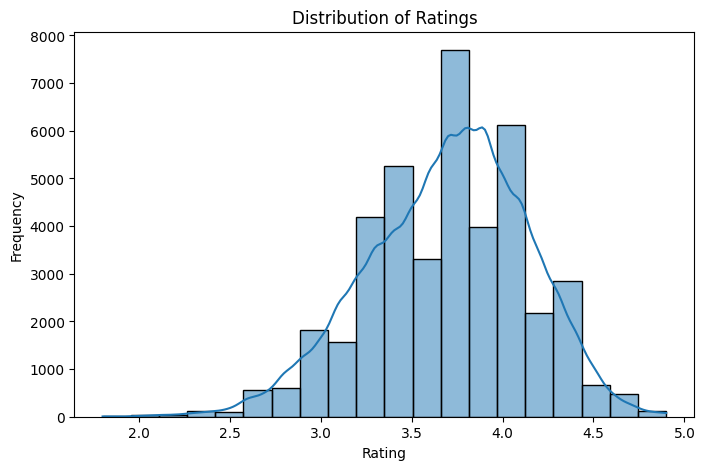

In [ ]:
#Data Visualization Before Cleaning
#1. using a histogram to visualize the ratings distribution
# Converts all entries in 'rate' to strings, then replace 'NEW' with NaN and remove '/5'
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].replace('NEW', None)
data['rate'] = data['rate'].str.replace('/5', '', regex=False)

# Converts to numeric, with errors='coerce' to handle any remaining non-numeric values
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(data['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

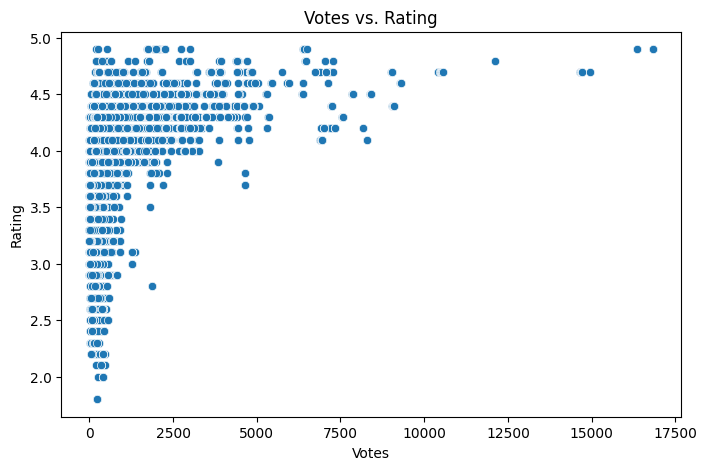

In [ ]:
#2. Scatter Plot To help uncover a relationship between votes and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='votes', y='rate')
plt.title("Votes vs. Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

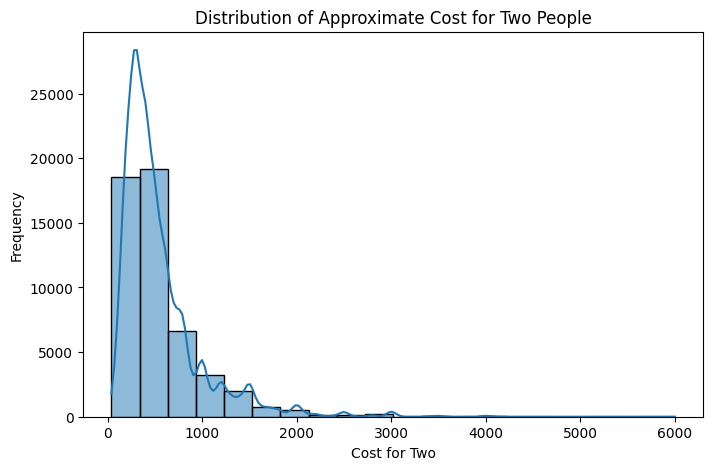

In [ ]:
#3. Histogram for 'approx_cost(for two people)'
# Ensures all entries in 'approx_cost(for two people)' are strings
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)

# Removes commas and convert the column to numeric, setting non-numeric values to NaN
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(data['approx_cost(for two people)'].dropna(), bins=20, kde=True)
plt.title("Distribution of Approximate Cost for Two People")
plt.xlabel("Cost for Two")
plt.ylabel("Frequency")
plt.show()

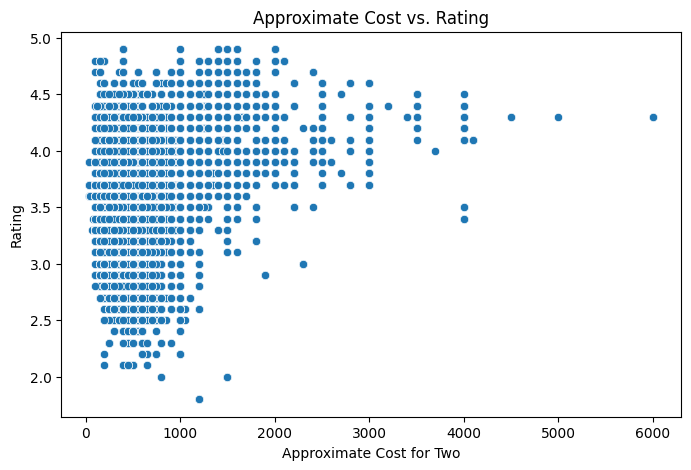

In [ ]:
# 4.Scatter Plot for Cost vs Rating to see if there is a relationship between cost and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='approx_cost(for two people)', y='rate')
plt.title("Approximate Cost vs. Rating")
plt.xlabel("Approximate Cost for Two")
plt.ylabel("Rating")
plt.show()

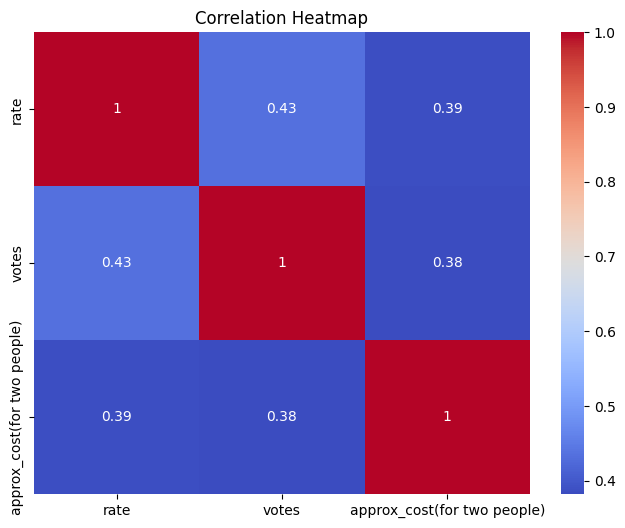

In [ ]:
 #5. Correlation heatmap (only numerical columns to visualize  correlations in numerical data)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['rate', 'votes', 'approx_cost(for two people)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

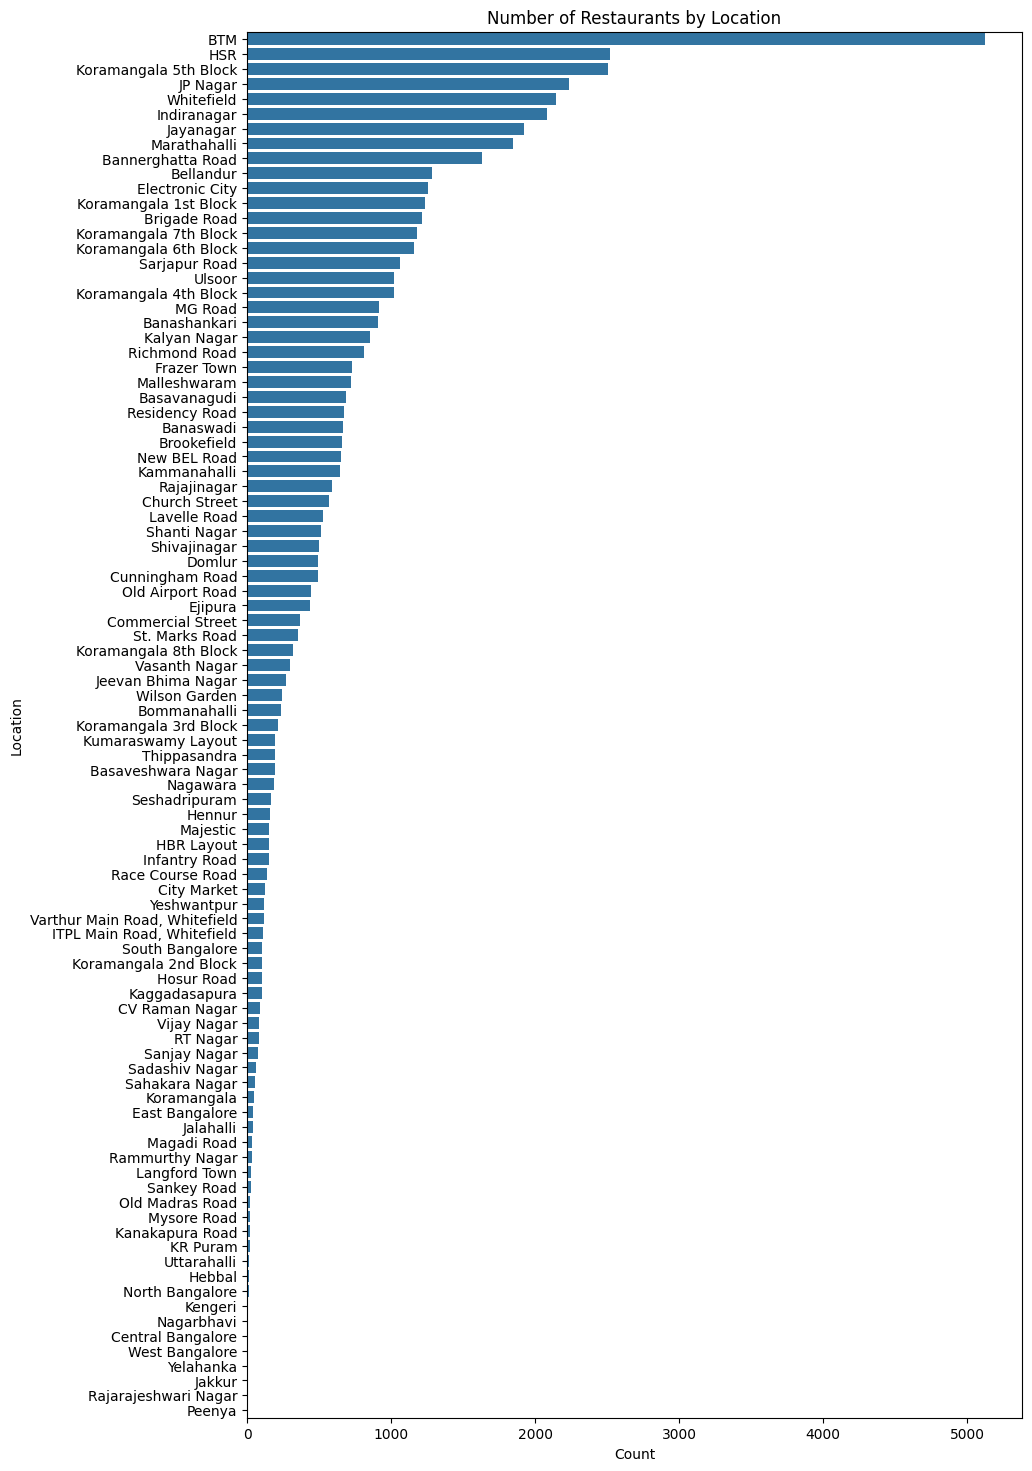

In [ ]:
#6. Count of restaurants in each location
plt.figure(figsize=(10,18))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index)
plt.title("Number of Restaurants by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

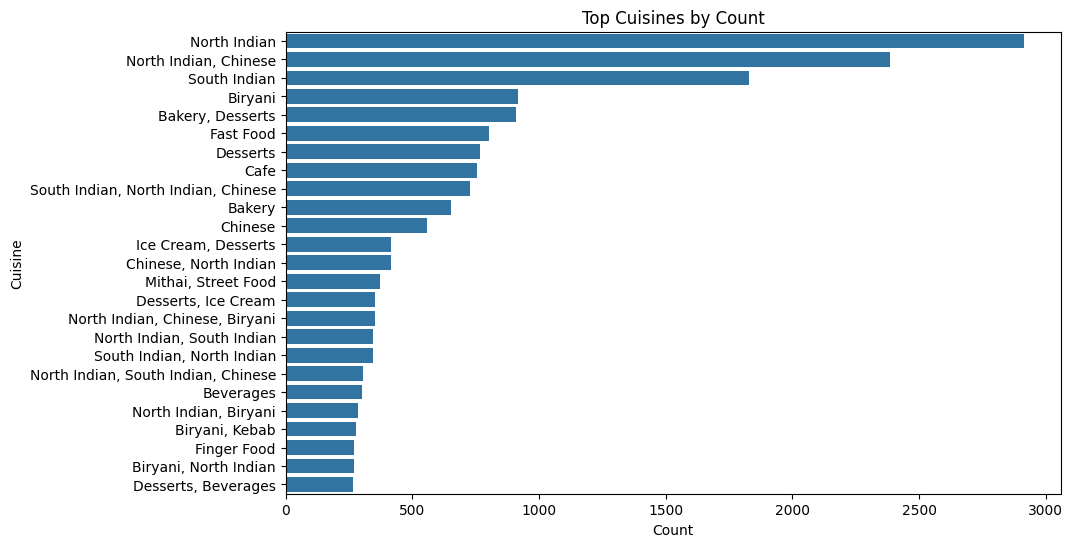

In [ ]:
#7. Count of restaurants by cuisine type
plt.figure(figsize=(10, 6))
top_cuisines = data['cuisines'].value_counts().head(25)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top Cuisines by Count")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

In [ ]:
#Research Questions


In [ ]:
# Data Cleaning
# Handles anomalies in 'rate' column
data['rate'] = data['rate'].replace('NEW', 'NaN')  # Replaces 'NEW' with NaN
data['rate'] = data['rate'].astype(str)  # Ensures 'rate' is of string type
data['rate'] = data['rate'].str.extract('(\d+\.\d+)')  # Extracts numeric values
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')  # Converts to float, invalid values become NaN
# Handling missing values
data['rate'] = data['rate'].fillna(data['rate'].median())  # Impute NaN with median as it doesn't get affected with outliers or data skew as the mean

In [ ]:
# Handling anomalies in 'approx_cost(for two people)' column
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].replace(',', '', regex=True)
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')  # Convert to float
# Handling missing values
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median())  # Impute NaN with median

In [ ]:
# Handling anomalies in 'phone' column
data['phone'] = data['phone'].str.replace(r'\r\n', ' ', regex=True)  # Replaces newline characters with space
# Handling missing values
data['phone'] = data['phone'].fillna("Unknown")  # Assigns 'Unknown' to missing phone values

In [ ]:
# Handling anomalies in 'reviews_list' column
#data['reviews_list'] = data['reviews_list'].apply(lambda x: [] if x == '[]' else x)  # Replaces empty strings with empty list
data =data.drop(columns=['reviews_list'])

In [ ]:
data =data.drop(columns=['menu_item'])

In [ ]:
# Handling missing values in the rest of the columns
data['location'] = data['location'].fillna(data['location'].mode()[0])  # Mode imputation for location since it's a categorical value
data['rest_type'] = data['rest_type'].fillna(data['rest_type'].mode()[0])  # Mode imputation for rest_type since it's a categorical value
data['cuisines'] = data['cuisines'].fillna(data['cuisines'].mode()[0])  # Mode imputation for cuisines since it's a categorical value
data['dish_liked'] = data['dish_liked'].fillna(data['dish_liked'].mode()[0])  # Mode imputation for dish_liked since it's a categorical value
print("Missing Values per Column:\n", data.isnull().sum())
print("Data Types of Each Column:\n", data.dtypes)


Missing Values per Column:
 url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64
Data Types of Each Column:
 url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisine

In [ ]:
# IQR was chosen as we don't know the distribution of the data and there's also multiple data types which makes IQR the best fit to determine outliers and handle them
Q1 = data.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = data.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

outliers_iqr = (data.select_dtypes(include=['float64', 'int64']) < min) | (data.select_dtypes(include=['float64', 'int64']) > max)

outlier_rows = data[outliers_iqr.any(axis=1)]
print("Outliers based on IQR method:\n", outlier_rows)

data_cleaned = data[~outliers_iqr.any(axis=1)]
print("Cleaned Dataframe without outliers:\n", data_cleaned)

Outliers based on IQR method:
                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
7      https://www.zomato.com/bangalore/onesta-banash...   
9      https://www.zomato.com/bangalore/smacznego-ban...   
...                                                  ...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
7      2

In [ ]:
print(data.shape)

(51717, 15)


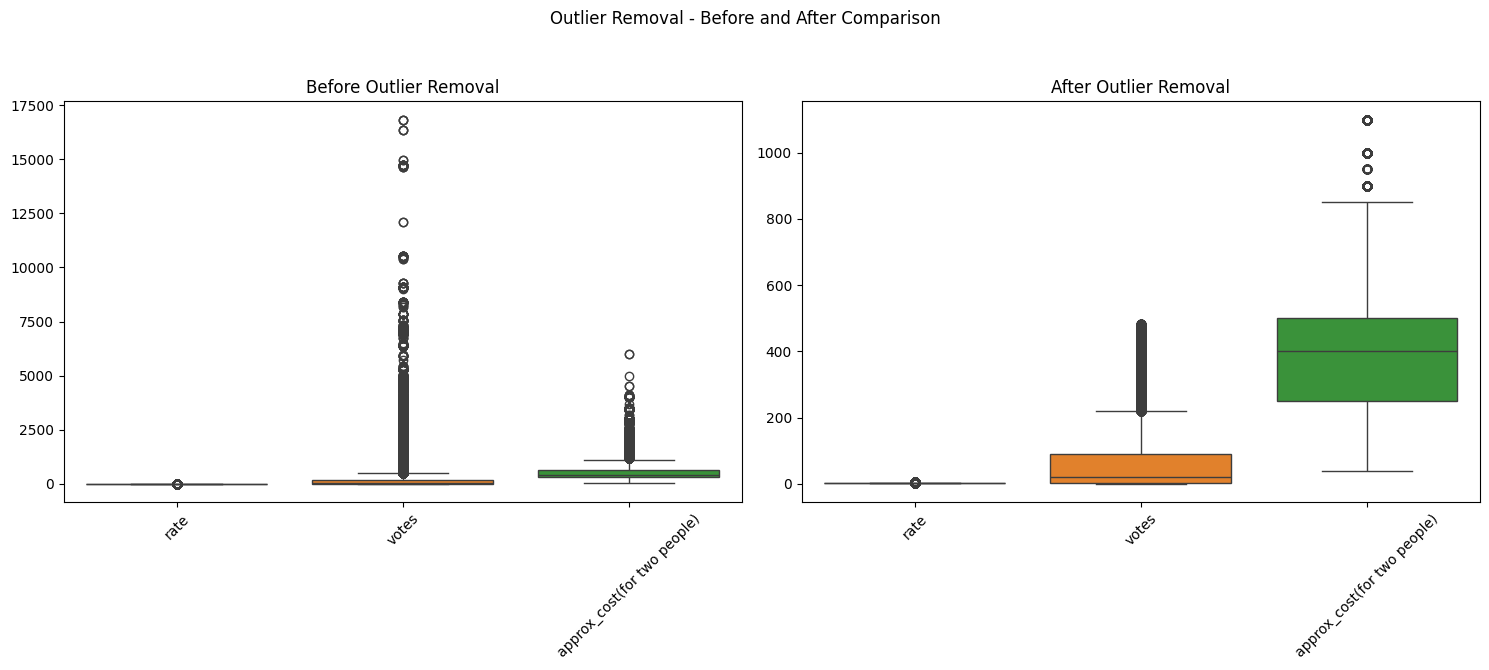

In [ ]:
# Data Visualization After Data Cleaning
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.suptitle("Outlier Removal - Before and After Comparison")

# Box plot before removing outliers
sns.boxplot(data=data[numerical_cols], ax=axes[0])
axes[0].set_title("Before Outlier Removal")
axes[0].tick_params(axis='x', rotation=45)

# Box plot after removing outliers
sns.boxplot(data=data_cleaned[numerical_cols], ax=axes[1])
axes[1].set_title("After Outlier Removal")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Research questions

What are the most popular cuisines in terms of the number of votes and ratings?
Objective: To identify which cuisines attract more customers and higher ratings


<Axes: xlabel='votes', ylabel='Count'>

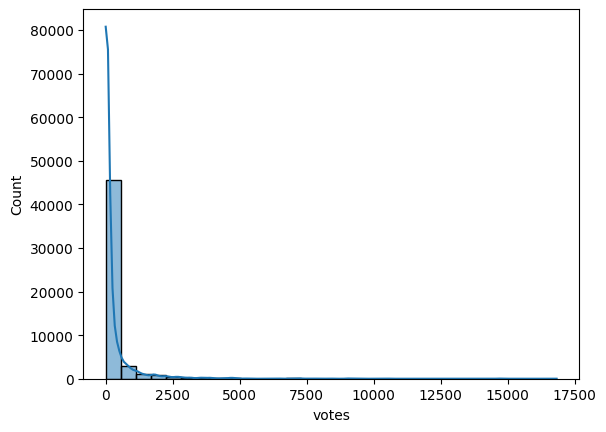

In [ ]:
#Histogram to show the distribution of number of votes
#Histogram of Votes: Shows how the number of votes is distributed across cuisines.
#Helps identify if the data is skewed
sns.histplot(data['votes'], bins=30, kde=True)


<Axes: xlabel='cuisines'>

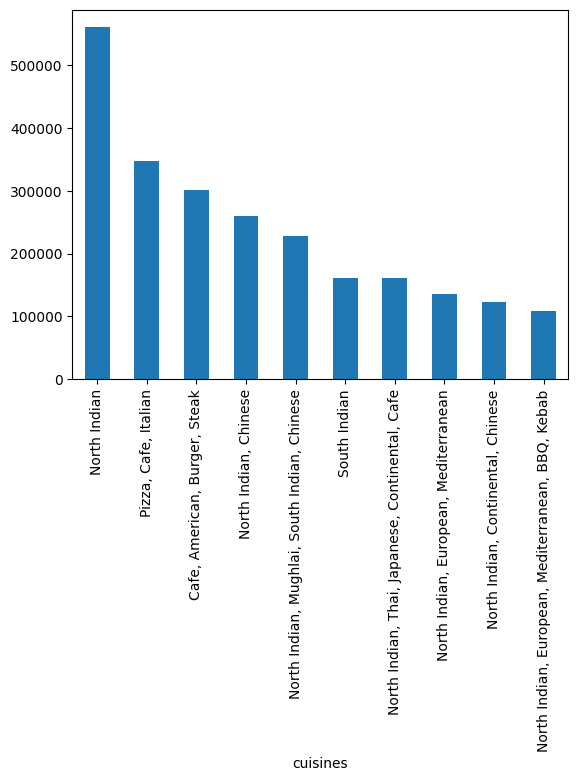

In [ ]:
# Top 10 Cuisines by Total Votes
# Bar Chart: Displays the top cuisines in terms of total votes.
# Insight: to identify the cuisines that attract the most customers.
# Iteration: Initially considered all cuisines but narrowed the analysis to the top 10 for clearer insights.
cuisine_votes = data.groupby('cuisines')['votes'].sum().sort_values(ascending=False)
cuisine_votes.head(10).plot(kind='bar')

<ipython-input-40-0ec01cb74380>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisines', y='rate', data=filtered_data, order=filtered_data.groupby('cuisines')['rate'].median().sort_values(ascending=False).index, palette='Set2')


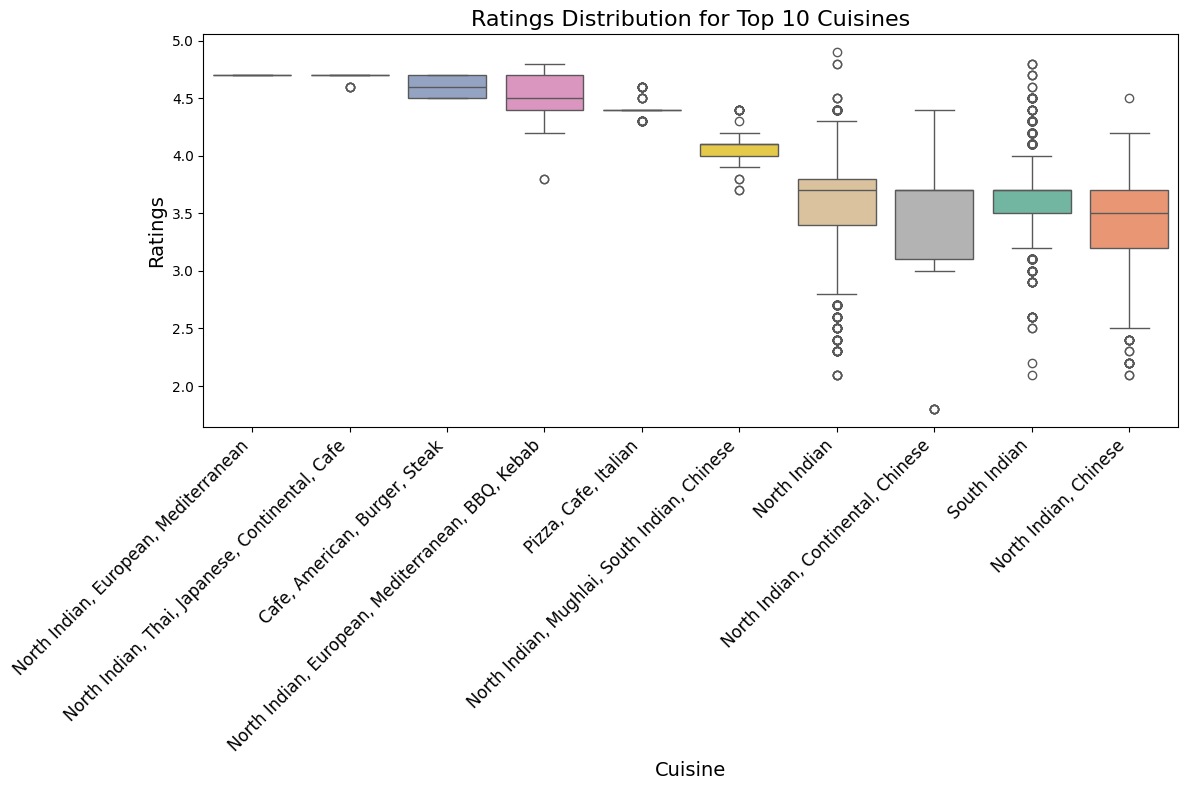

In [ ]:
# Filter top cuisines by total votes
top_cuisines = data.groupby('cuisines')['votes'].sum().sort_values(ascending=False).head(10).index
filtered_data = data[data['cuisines'].isin(top_cuisines)]

# Plot box plot for top cuisines
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.boxplot(x='cuisines', y='rate', data=filtered_data, order=filtered_data.groupby('cuisines')['rate'].median().sort_values(ascending=False).index, palette='Set2')
plt.title('Ratings Distribution for Top 10 Cuisines', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()
plt.show()



2. Which locations have the highest-rated or most frequently reviewed restaurants?
Objective: To analyze which locations tend to have the most popular restaurants, based on both ratings and reviews.


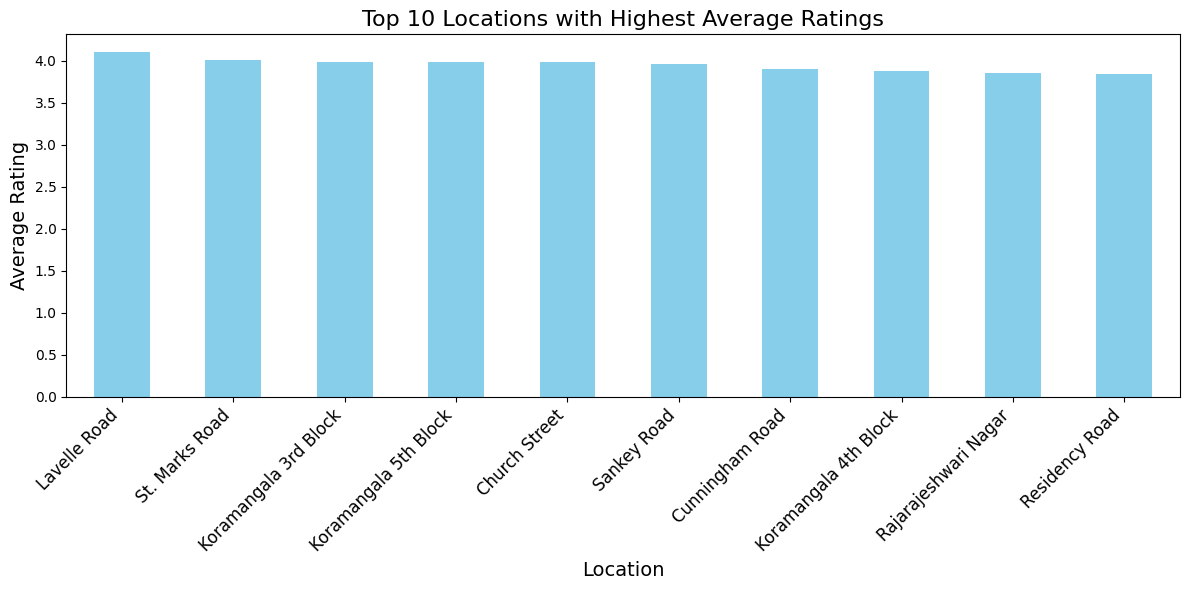

In [ ]:
location_avg_ratings = data.groupby('location')['rate'].mean().sort_values(ascending=False)

# Plot the top 10 highest-rated locations
plt.figure(figsize=(12, 6))
location_avg_ratings.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with Highest Average Ratings', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


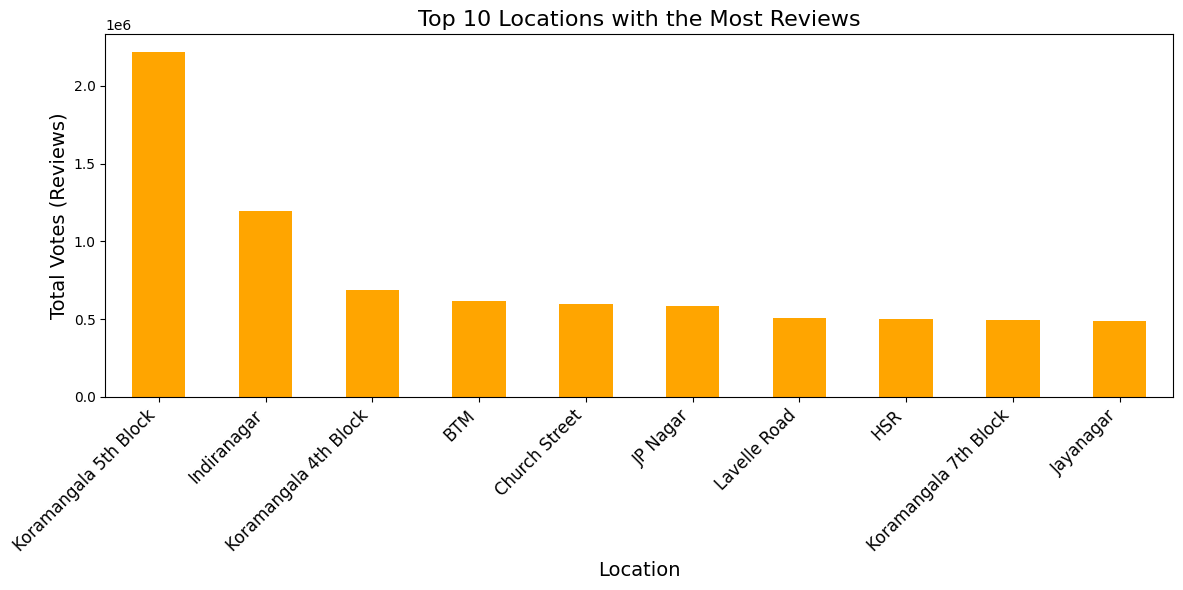

In [ ]:
location_total_votes = data.groupby('location')['votes'].sum().sort_values(ascending=False)

# Plot the top 10 most reviewed locations
plt.figure(figsize=(12, 6))
location_total_votes.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Locations with the Most Reviews', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Votes (Reviews)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-43-5434451d00be>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='popularity_score', data=location_stats_sorted.head(10), palette='coolwarm')


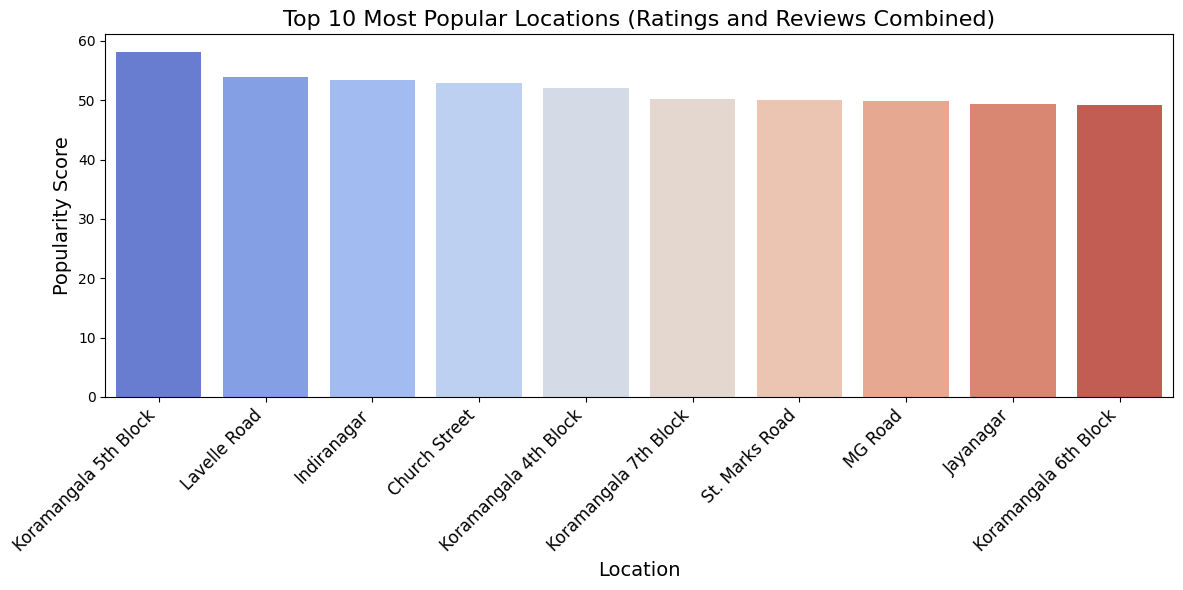

In [ ]:
# Calculate average ratings and total votes for each location
location_stats = data.groupby('location').agg({'rate': 'mean', 'votes': 'sum'}).reset_index()
location_stats['popularity_score'] = location_stats['rate'] * np.log1p(location_stats['votes'])

# Sort by popularity score
location_stats_sorted = location_stats.sort_values('popularity_score', ascending=False)

# Plot the top 10 most popular locations
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='popularity_score', data=location_stats_sorted.head(10), palette='coolwarm')
plt.title('Top 10 Most Popular Locations (Ratings and Reviews Combined)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Popularity Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


3.	Are there certain types of restaurants that consistently perform better in specific locations, and how does this vary by location?  Objective: To see if certain restaurant types are more successful in specific areas and to explore if location-specific preferences exist.

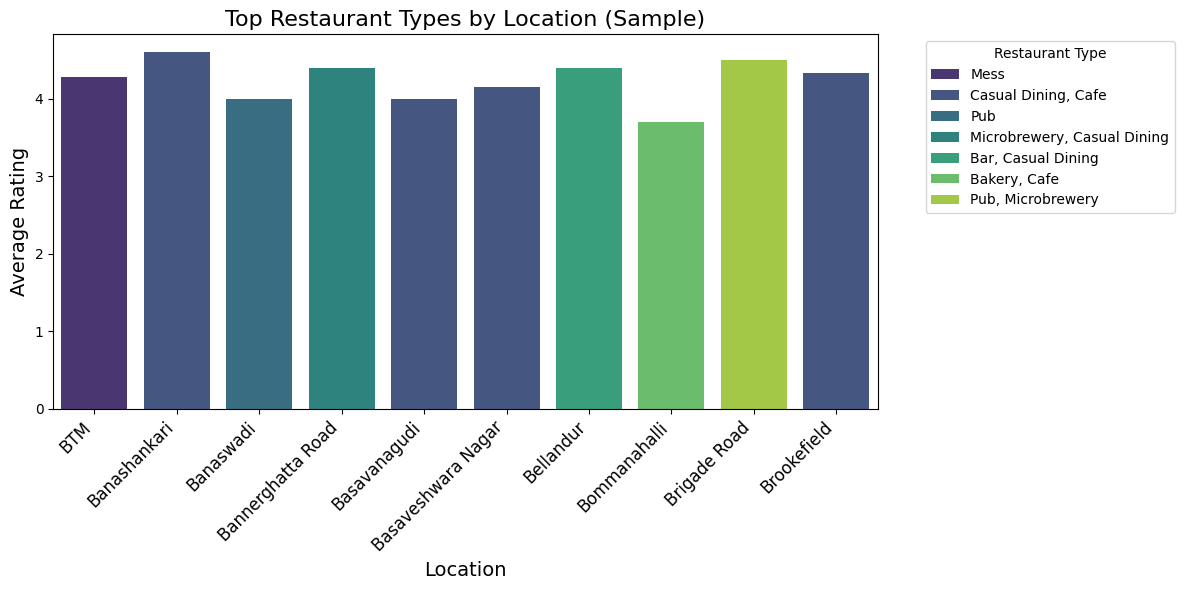

In [ ]:
# Group by location and restaurant type, then calculate the average ratings
type_location_ratings = data.groupby(['location', 'rest_type'])['rate'].mean().reset_index()

# Find the top-performing restaurant type in each location
top_types_by_location = type_location_ratings.sort_values(['location', 'rate'], ascending=[True, False]).groupby('location').head(1)

# Plot a sample for visualization (e.g., top 10 locations)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='rate', hue='rest_type', data=top_types_by_location.head(10), palette='viridis')
plt.title('Top Restaurant Types by Location (Sample)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


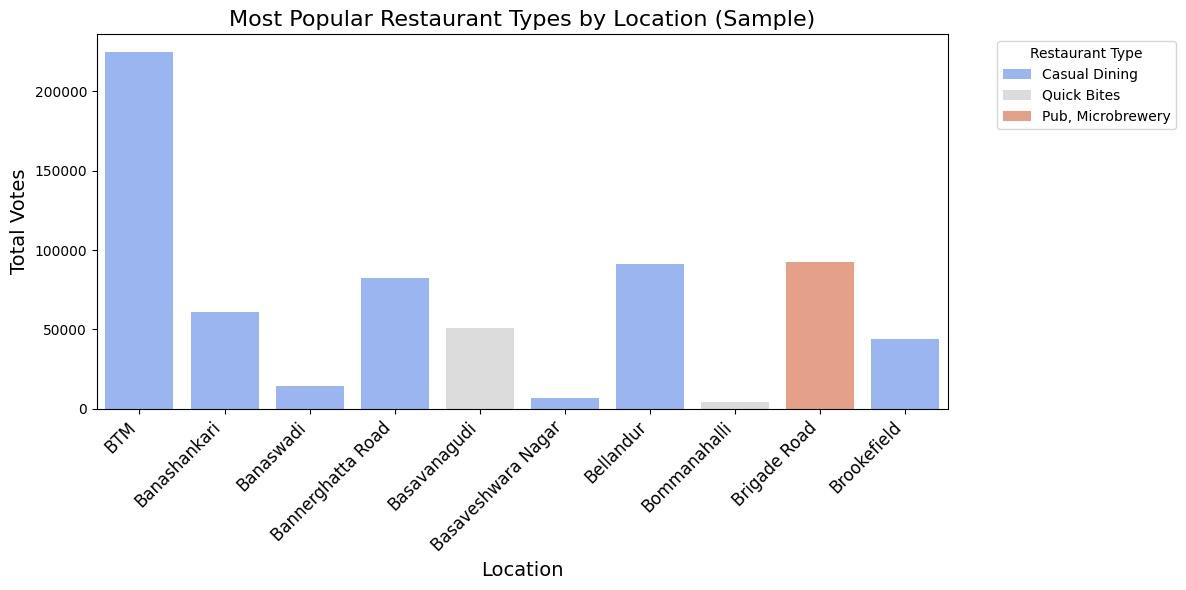

In [ ]:
# Group by location and restaurant type, then sum the votes
type_location_votes = data.groupby(['location', 'rest_type'])['votes'].sum().reset_index()

# Find the most popular restaurant type in each location based on votes
popular_types_by_location = type_location_votes.sort_values(['location', 'votes'], ascending=[True, False]).groupby('location').head(1)

# Plot a sample for visualization (e.g., top 10 locations)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='votes', hue='rest_type', data=popular_types_by_location.head(10), palette='coolwarm')
plt.title('Most Popular Restaurant Types by Location (Sample)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Votes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


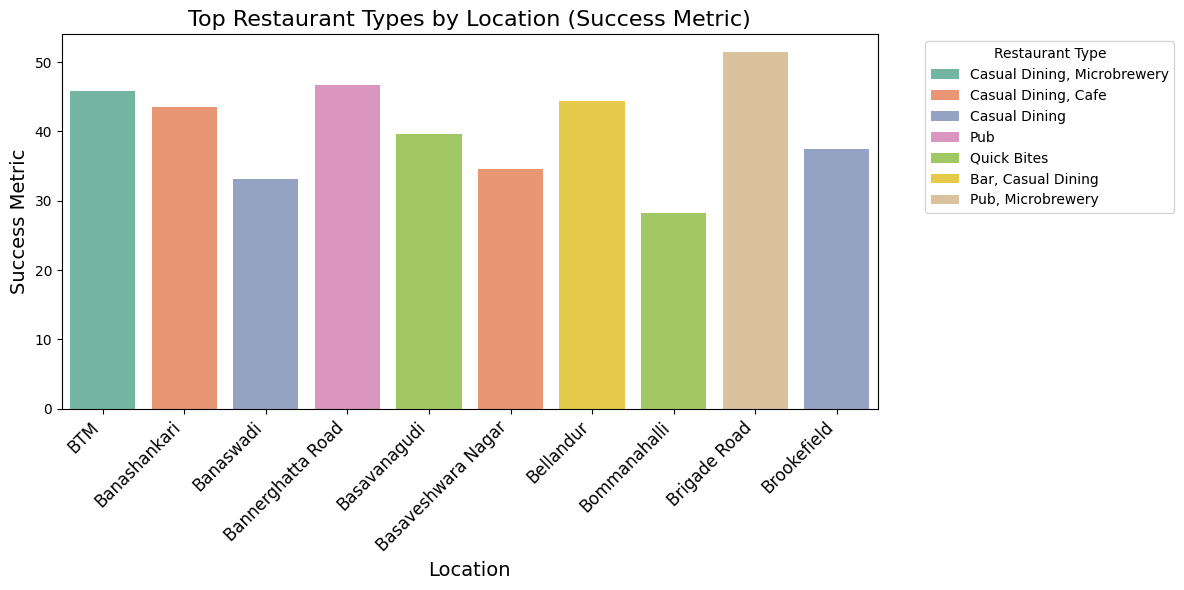

In [ ]:
# Combine ratings and votes for a success metric
type_location_stats = data.groupby(['location', 'rest_type']).agg({'rate': 'mean', 'votes': 'sum'}).reset_index()
type_location_stats['success_metric'] = type_location_stats['rate'] * np.log1p(type_location_stats['votes'])

# Find the top-performing restaurant type in each location based on the success metric
successful_types_by_location = type_location_stats.sort_values(['location', 'success_metric'], ascending=[True, False]).groupby('location').head(1)

# Plot a sample for visualization (e.g., top 10 locations)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='success_metric', hue='rest_type', data=successful_types_by_location.head(10), palette='Set2')
plt.title('Top Restaurant Types by Location (Success Metric)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Success Metric', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


4- What is the distribution of the number of votes  across restaurants of different types (Casual Dining, Fine Dining, etc.)? Visualization: Box plot or bar chart showing the distribution of votes for different restaurant types. This will help reveal if certain types of restaurants tend to accumulate more reviews and how they compare in terms of engagement

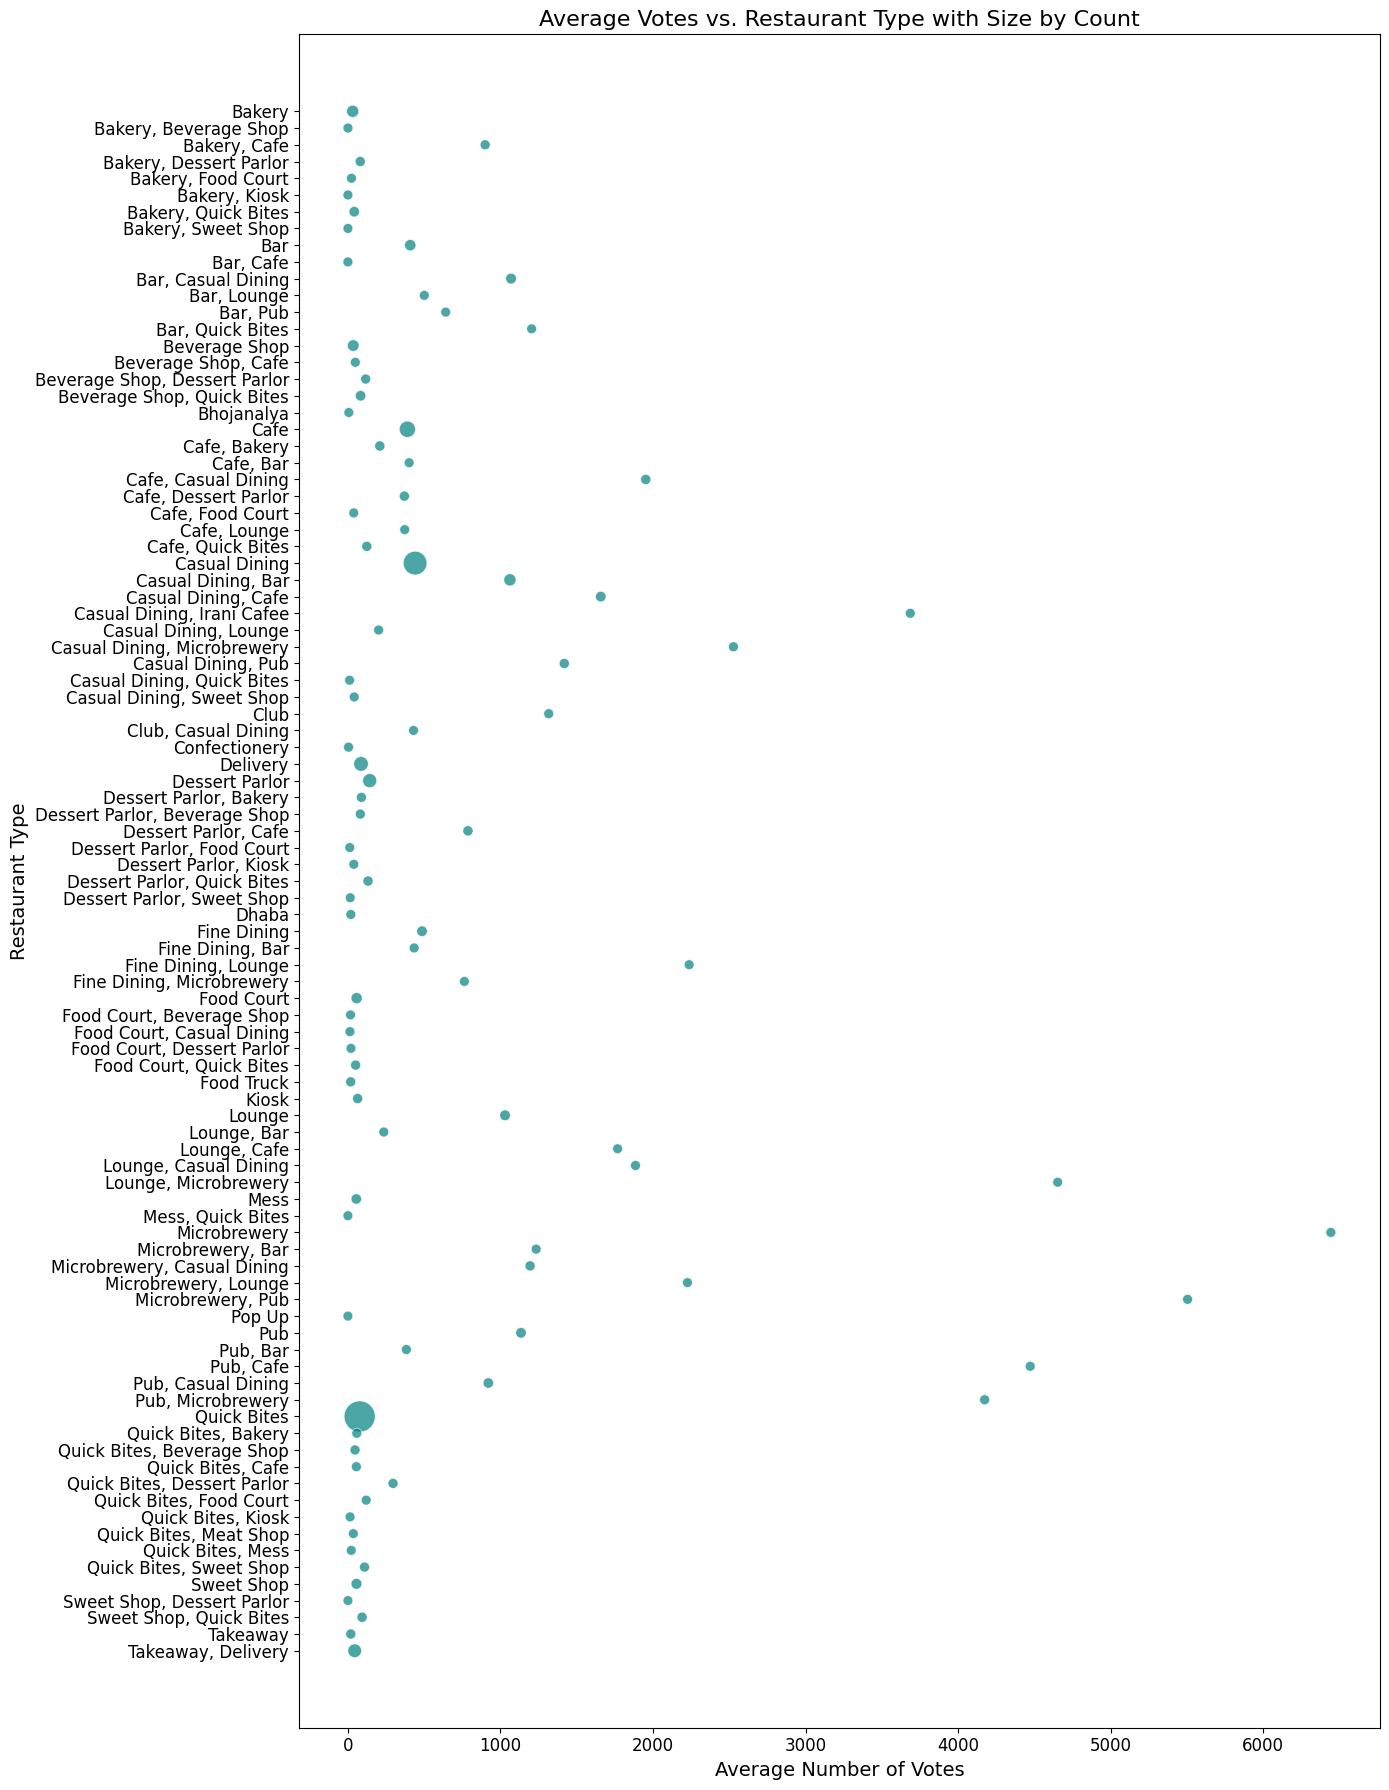

In [ ]:
# Aggregate data for the bubble chart
bubble_data = data.groupby('rest_type').agg( avg_votes=('votes', 'mean'), count=('rest_type', 'size')).reset_index()

plt.figure(figsize=(14, 18))
sns.scatterplot(
    data=bubble_data,
    x='avg_votes',
    y='rest_type',
    size='count',
    sizes=(50, 500),  # Bubble size range
    alpha=0.7,
    legend=False,
    color='teal'
)
plt.title('Average Votes vs. Restaurant Type with Size by Count', fontsize=16)
plt.xlabel('Average Number of Votes', fontsize=14)
plt.ylabel('Restaurant Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
